<a href="https://colab.research.google.com/github/Abre1234/CodeAlpha_Sales_Prediction/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sales Prediction using Advertising Data
This project predicts product sales based on advertising budget across TV, Radio, and Newspaper platforms using a Linear Regression model. Built as part of CodeAlpha Internship.

In [ ]:

#Import require libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Load data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Advertising.csv')  # or your path
df.drop('Unnamed: 0',axis=1,inplace=True)
print(df.head())
print(df.info())
print(df.describe())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000

In [ ]:

# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


EDA

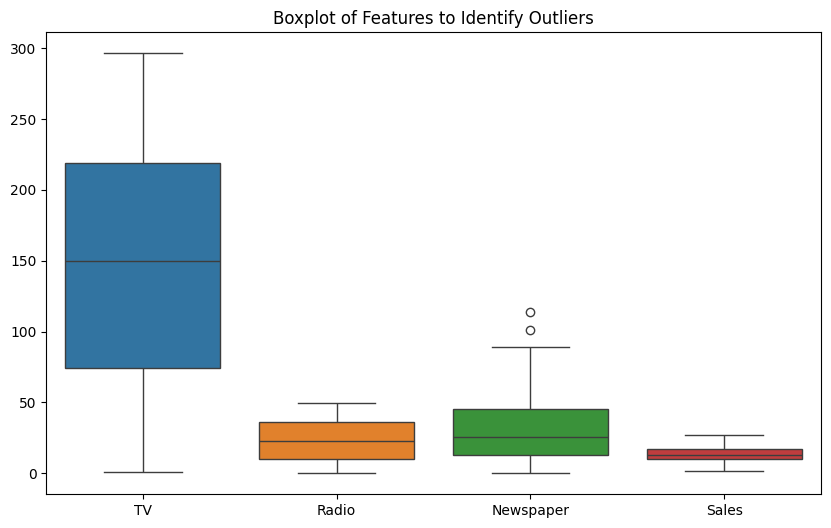

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['TV', 'Radio', 'Newspaper', 'Sales']])
plt.title("Boxplot of Features to Identify Outliers")
plt.show()

  We see from above box plot have outliers in newspaper and their is no outliers from others .

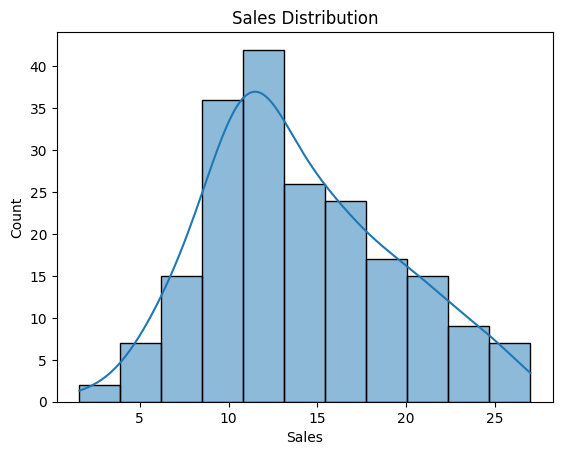

In [ ]:

sns.histplot(df['Sales'], kde=True)
plt.title("Sales Distribution")
plt.show()

     It approximately normal

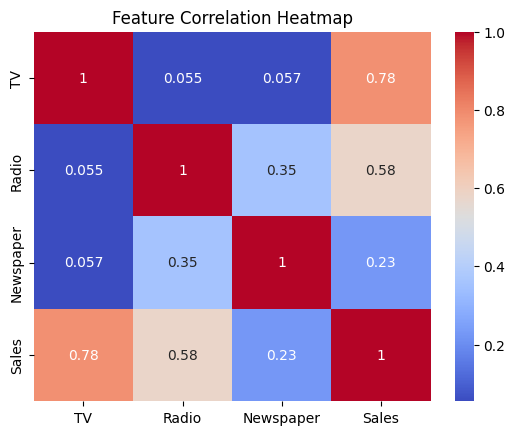

In [ ]:

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

Data preprocess and cleaning

In [ ]:

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] < lower) | (df[column] > upper)]

In [ ]:
newspaper_outliers = detect_outliers_iqr(df, 'Newspaper')

In [ ]:
df = df.drop(index=newspaper_outliers.index)

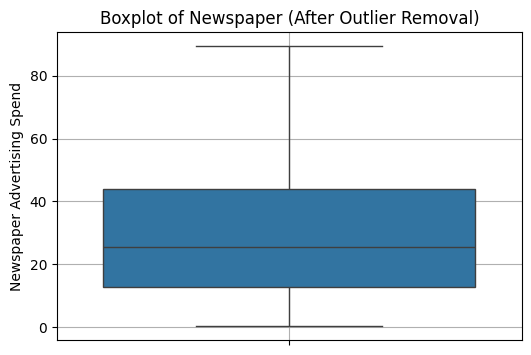

In [ ]:

plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Newspaper'])
plt.title("Boxplot of Newspaper (After Outlier Removal)")
plt.ylabel("Newspaper Advertising Spend")
plt.grid(True)
plt.show()

Feature Extraction

In [ ]:

# Features (inputs)
X = df[['TV', 'Radio', 'Newspaper']]

# Target (output)
y = df['Sales']

Split And Model Training

In [ ]:


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
print(" Model trained successfully")

 Model trained successfully


Linear regression suitable model for continuous variable

Predict on train and test

In [ ]:

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

Evaluation

In [ ]:
# Train set evaluation
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Test set evaluation
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

# Print comparison
print(" Training Set:")
print(f"RMSE: {train_rmse:.2f}")
print(f"R²: {train_r2:.2f}")

print("\n Test Set:")
print(f"RMSE: {test_rmse:.2f}")
print(f"R²: {test_r2:.2f}")

 Training Set:
RMSE: 1.69
R²: 0.89

 Test Set:
RMSE: 1.66
R²: 0.90


Their is no overfit the model because r_2 of test is greater than train

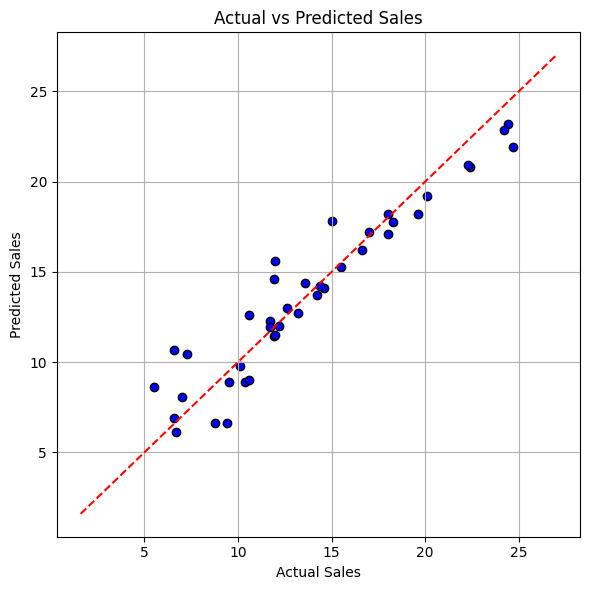

In [ ]:


# Scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, color='blue', edgecolors='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # perfect prediction line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

GUI

In [ ]:
!pip install gradio --quiet

In [ ]:

def predict_sales(tv, radio, newspaper):
    data = np.array([[tv, radio, newspaper]])
    prediction = model.predict(data)
    return f" Predicted Sales: {prediction[0]:.2f} units"

In [ ]:


import gradio as gr

interface = gr.Interface(
    fn=predict_sales,
    inputs=[
        gr.Slider(0, 300, label="TV Advertising Spend"),
        gr.Slider(0, 50, label="Radio Advertising Spend"),
        gr.Slider(0, 120, label="Newspaper Advertising Spend")
    ],
    outputs="text",
    title=" Sales Prediction App",
    description="Enter advertising budget to predict sales using a trained Linear Regression model."
)
interface.launch()#in parameter can add share=False,debug=True